In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from collections import OrderedDict
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

#####Función que permite selecionar un subconjunto que cumpla con una determinada condición de un dataFrame

In [3]:
def select_rows(df, group, col):
    #Creamos un nueva DataFrame
    out = pd.DataFrame()
    tmp = df.copy()
    # Recorremos los grupos
    for s in group:
        # Añadimos al DataFrame el nuevo elemento
        out = pd.concat([out, tmp[tmp[col] == s]])
    out = out.reset_index(drop=True)
    return out

##### Cargamos los datos necesarios: las calificaciones y la información sobre las asignaturas

In [4]:
assig = pd.read_csv("datos3/assigs.csv", na_values=np.nan)
qualifications = pd.read_csv("datos3/qualifications.csv", na_values=np.nan)

####Unimos las tablas que representan las cualificaciones y la informacion de la asignaturas por tal de separar las cualificaciones por cursos y semestres

In [5]:
cual = pd.merge(qualifications, assig)
print cual.columns

Index([u'any_matriculacio_assig', u'id_alumne', u'id_enseny', u'id_assig', u'tipus_apunt', u'nota_primera_conv', u'nota_segona_conv', u'desc_assig', u'curs_assig', u'semestre_assig', u'id_enseny_assig', u'credits_assig'], dtype='object')


#### Nos quedamos con la información que necsitamos (id_enseny, nota_primera_conv, curs_assig, semestre_assig) y agrupamos las calificaciones en función del grado cursado y del curso y semestre de la asignatura

In [6]:
# Nos quedamos con las columnas que nos interesa
cual = cual[['id_enseny', 'nota_primera_conv', 'curs_assig', 'semestre_assig']]
# Separamos las asignaturas en funcíon de los dos grados
cual_info = cual[cual['id_enseny'] == 'G1077'].reset_index(drop = True)
cual_mates = cual[cual['id_enseny'] == 'G1042'].reset_index(drop = True)
# Agrupamos las calificaciones en funcíon del curso y el semestre de la asignatura
cual_info_g = cual_info.groupby(['curs_assig', 'semestre_assig'])
cual_mates_g = cual_mates.groupby(['curs_assig', 'semestre_assig'])

##### A continuación se muestra información sobre la media y la desviación estandar por cada curso y semestre del grado de Ingeníeria Informática

In [7]:
print "Medias y desviaciones estandar grado de Ingenieria Informatica"
print "Primer curso"
print "Primer semestre: Media: " + str(cual_info_g.get_group((1,1)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_info_g.get_group((1,1)).nota_primera_conv.values.std())
print "Segundo semestre: Media: " + str(cual_info_g.get_group((1,2)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_info_g.get_group((1,2)).nota_primera_conv.values.std())
print
print "Segundo curso"
print "Primer semestre: Media: " + str(cual_info_g.get_group((2,1)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_info_g.get_group((2,1)).nota_primera_conv.values.std())
print "Segundo semestre: Media: " + str(cual_info_g.get_group((2,2)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_info_g.get_group((2,2)).nota_primera_conv.values.std())
print
print "Tercer curso"
print "Primer semestre: Media: " + str(cual_info_g.get_group((3,1)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_info_g.get_group((3,1)).nota_primera_conv.values.std())
print "Segundo semestre: Media: " + str(cual_info_g.get_group((3,2)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_info_g.get_group((3,2)).nota_primera_conv.values.std())
print
print "Cuarto curso"
print "Primer semestre: Media: " + str(cual_info_g.get_group((4,1)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_info_g.get_group((4,1)).nota_primera_conv.values.std())
print "Segundo semestre: Media: " + str(cual_info_g.get_group((4,2)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_info_g.get_group((4,2)).nota_primera_conv.values.std())

Medias y desviaciones estandar grado de Ingenieria Informatica
Primer curso
Primer semestre: Media: 4.92080405933 Desviación estandar: 2.78863823014
Segundo semestre: Media: 4.39784567176 Desviación estandar: 2.83068340986

Segundo curso
Primer semestre: Media: 5.4793445122 Desviación estandar: 2.39499768259
Segundo semestre: Media: 6.12325581395 Desviación estandar: 2.57840972474

Tercer curso
Primer semestre: Media: 6.21417565485 Desviación estandar: 2.11362502851
Segundo semestre: Media: 5.49440559441 Desviación estandar: 2.38802303534

Cuarto curso
Primer semestre: Media: 7.59102564103 Desviación estandar: 1.48135297629
Segundo semestre: Media: 7.57238095238 Desviación estandar: 2.11950107508


##### A continuación se muestra información sobre la media y la desviación estandar por cada curso y semestre del grado de Ingeníeria Informática

In [8]:
print "Medias y desviaciones estandar grado de Matematicas"
print "Primer curso"
print "Primer semestre: Media: " + str(cual_mates_g.get_group((1,1)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_mates_g.get_group((1,1)).nota_primera_conv.values.std())
print "Segundo semestre: Media: " + str(cual_mates_g.get_group((1,2)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_mates_g.get_group((1,2)).nota_primera_conv.values.std())
print
print "Segundo curso"
print "Primer semestre: Media: " + str(cual_mates_g.get_group((2,1)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_mates_g.get_group((2,1)).nota_primera_conv.values.std())
print "Segundo semestre: Media: " + str(cual_mates_g.get_group((2,2)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_mates_g.get_group((2,2)).nota_primera_conv.values.std())
print
print "Tercer curso"
print "Primer semestre: Media: " + str(cual_mates_g.get_group((3,1)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_mates_g.get_group((3,1)).nota_primera_conv.values.std())
print "Segundo semestre: Media: " + str(cual_mates_g.get_group((3,2)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_mates_g.get_group((3,2)).nota_primera_conv.values.std())
print
print "Cuarto curso"
print "Primer semestre: Media: " + str(cual_mates_g.get_group((4,1)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_mates_g.get_group((4,1)).nota_primera_conv.values.std())
print "Segundo semestre: Media: " + str(cual_mates_g.get_group((4,2)).nota_primera_conv.values.mean()) + " Desviación estandar: " + str(cual_mates_g.get_group((4,2)).nota_primera_conv.values.std())

Medias y desviaciones estandar grado de Matematicas
Primer curso
Primer semestre: Media: 4.4271243198 Desviación estandar: 2.75722137539
Segundo semestre: Media: 3.38321256039 Desviación estandar: 3.06453730183

Segundo curso
Primer semestre: Media: 4.68174603175 Desviación estandar: 2.67734916264
Segundo semestre: Media: 4.70884658455 Desviación estandar: 2.85771193136

Tercer curso
Primer semestre: Media: 5.13229461756 Desviación estandar: 2.4539335604
Segundo semestre: Media: 5.08513931889 Desviación estandar: 2.51433578174

Cuarto curso
Primer semestre: Media: 7.31265822785 Desviación estandar: 2.51709934972
Segundo semestre: Media: 7.06551724138 Desviación estandar: 2.22280901224


##### Separamos las notas en funcíon del grado de las asignaturas

In [9]:
# Cambioamos los nombres de la columnas
cual=cual.rename(columns = {'curs_assig':'Curso', 'semestre_assig':'Semestre' })
# Separamos las notas en función del grado de las asignaturas
cual_info = cual[cual['id_enseny'] == 'G1077'].reset_index(drop = True)
cual_mates = cual[cual['id_enseny'] == 'G1042'].reset_index(drop = True)

##### Mostramos un diagragrama de barras agrupado con la información de las medias para cada curso y semestre del grado de Ingeníeria Informática

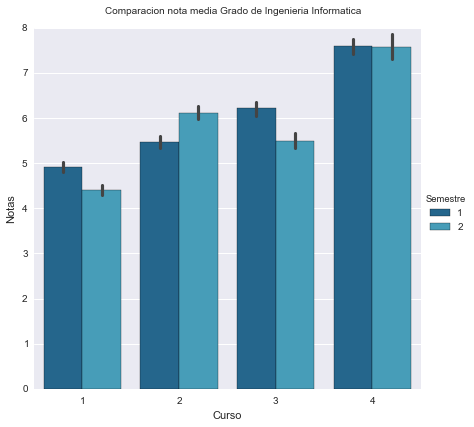

In [10]:
sns.set(style="darkgrid")
g = sns.factorplot("Curso", "nota_primera_conv", "Semestre",
                    data=cual_info, kind="bar",
                    size=6, palette="YlGnBu_d", estimator=np.mean)
g.despine(left=True)
g.set_ylabels("Notas")
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Comparacion nota media Grado de Ingenieria Informatica')

##### Mostramos un diagragrama de cajas agrupado con la información de las notas para cada curso y semestre del grado de Ingeníeria Informática

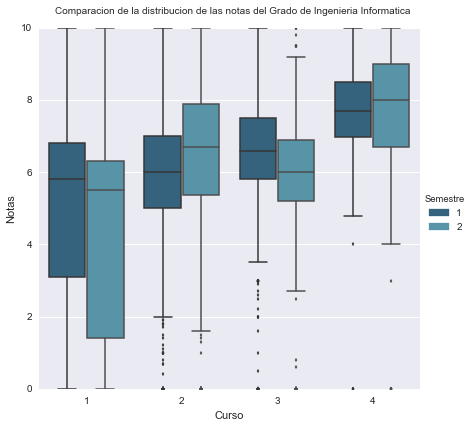

In [11]:
sns.set(style="darkgrid")
g = sns.factorplot("Curso", "nota_primera_conv", "Semestre",
                    data=cual_info, kind="box",
                    size=6, palette="YlGnBu_d", estimator=np.mean)
g.despine(left=True)
g.set_ylabels("Notas")
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Comparacion de la distribucion de las notas del Grado de Ingenieria Informatica')

##### Mostramos un diagragrama de barras agrupado con la información de las medias para cada curso y semestre del grado de Matemáticas

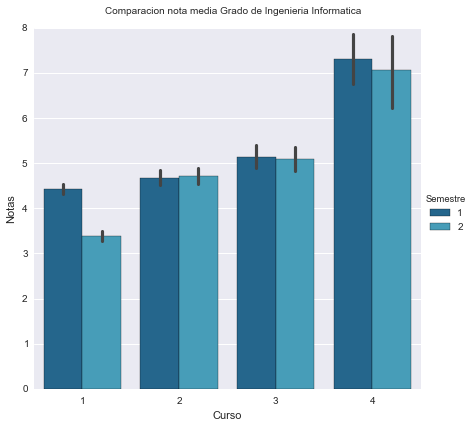

In [12]:
sns.set(style="darkgrid")
g = sns.factorplot("Curso", "nota_primera_conv", "Semestre",
                    data=cual_mates, kind="bar",
                    size=6, palette="YlGnBu_d", estimator=np.mean)
g.despine(left=True)
g.set_ylabels("Notas")
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Comparacion nota media Grado de Ingenieria Informatica')

##### Mostramos un diagragrama de barras agrupado con la información de las medias para cada curso y semestre del grado de Matemáticas

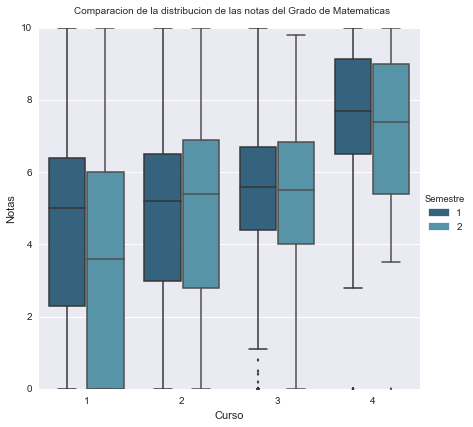

In [13]:
sns.set(style="darkgrid")
g = sns.factorplot("Curso", "nota_primera_conv", "Semestre",
                    data=cual_mates, kind="box",
                    size=6, palette="YlGnBu_d", estimator=np.mean)
g.despine(left=True)
g.set_ylabels("Notas")
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Comparacion de la distribucion de las notas del Grado de Matematicas')